<a id='home'></a>
# Feature Selection
Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performance.

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.

### Benefits of feature selection
* Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* Improves Accuracy: Less misleading data means modeling accuracy improves.
* Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

### 1. Filter Method
These methods are generally used while doing the pre-processing step. These methods select features from the dataset irrespective of the use of any machine learning algorithm. In terms of computation, they are very fast and inexpensive and are very good for removing duplicated, correlated, redundant features but these methods do not remove multicollinearity. Selection of feature is evaluated individually which can sometimes help when features are in isolation (don’t have a dependency on other features) but will lag when a combination of features can lead to increase in the overall performance of the model.

#### Types of Filter methods
1. [Information Gain](#information)
2. [Chi-square test](#chi-square)
3. [Fisher’s Score](#fisher-score)
4. [Correlation Coefficient](#correlation)
5. [Variance Threshold ](#variance)
6. [Mean Absolute Difference (MAD)](#mad)
7. [Dispersion Ratio](#dr)

### 2. Wrapper methods
Wrapper methods, also referred to as greedy algorithms train the algorithm by using a subset of features in an iterative manner. Based on the conclusions made from training in prior to the model, addition and removal of features takes place. Stopping criteria for selecting the best subset are usually pre-defined by the person training the model such as when the performance of the model decreases or a specific number of features has been achieved. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.

The main advantage of wrapper methods over the filter methods is that they provide an optimal set of features for training the model, thus resulting in better accuracy than the filter methods but are computationally more expensive.

#### Types of Wrapper method
1. [Forward Feature Selection](#ffe)
2. [Backward elimination ](#bfe)
3. [Bi-directional elimination](#bde)
4. [Exhaustive Feature Selection](#efs)
5. [Recursive Feature Elimination](#rfe)

### 3. Embedded methods
In embedded methods, the feature selection algorithm is blended as part of the learning algorithm, thus having its own built-in feature selection methods. These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features. Embedded methods encounter the drawbacks of filter and wrapper methods and merge their advantages. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.

These methods are faster like those of filter methods and more accurate than the filter methods and take into consideration a combination of features as well.

#### Types of Embedeed method
1. [Regularization](#regularization)
2. [Tree-based methods](#tree)
---

In [1]:
# dummy dataset
import pandas as pd
from sklearn.datasets import load_breast_cancer

# creating dataframe
df = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
df['target'] = load_breast_cancer().target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# features and label
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

print(features.shape, label.shape)

(569, 30) (569,)


## 1. Filter method
<a id='information'></a>
### 1.1 Information Gain
It is defined as the amount of information provided by the feature for identifying the target value and measures reduction in the entropy values. Information gain of each attribute is calculated considering the target values for feature selection. If you remember this is the same thing which is used while creating `decision tree`

**[▲ Go To Top](#home)**

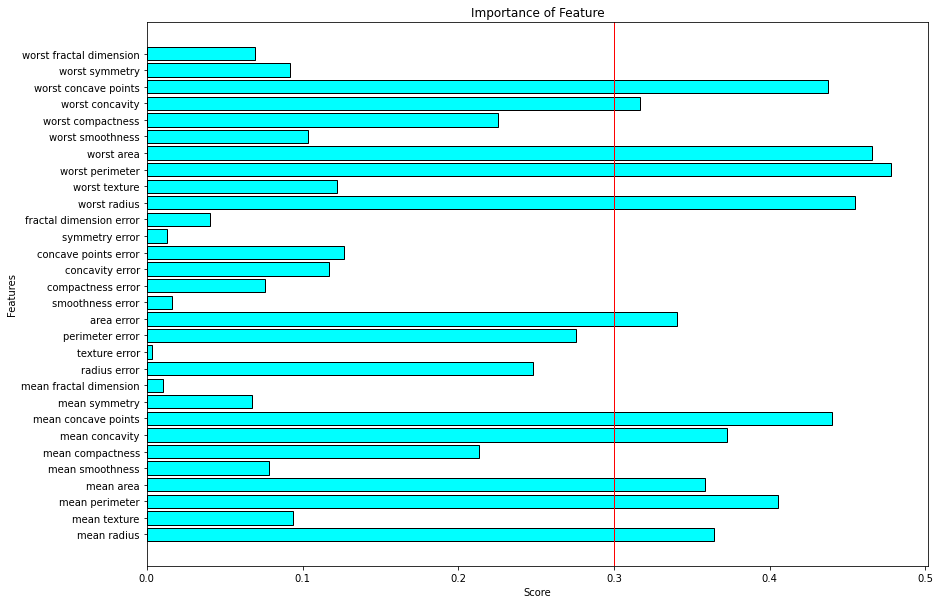

In [3]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# score of the dataset
score = mutual_info_classif(features, label)

# lets plot it
plt.figure(figsize=(14, 10))
plt.barh(features.columns, score, color = 'cyan', edgecolor='black')
plt.title('Importance of Feature')
plt.xlabel('Score')
plt.ylabel('Features')
plt.axvline(0.3,linewidth=1, color='red')
plt.show()

You can choose Top few columns for your final model or you can put some kind of threshold, like in above example we choose 0.3 threshold value

<a id="chi-square"></a>
### 1.2 Chi-Square
The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: 
* The variables have to be categorical, 
* The variables have to be sampled independently
* And the values should have an expected frequency greater than 5.

**[▲ Go To Top](#home)**

In [4]:
import seaborn as sns
df_t = sns.load_dataset('titanic')
df_t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# categorical columns
cate = df_t.drop(['age', 'fare', 'alive', 'deck'], axis=1) # we removed column which are numerical, not important, has lots of missing values
cate.head()

,survived,pclass,sex,sibsp,parch,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,1,0,S,Third,man,True,Southampton,False
1,1,1,female,1,0,C,First,woman,False,Cherbourg,False
2,1,3,female,0,0,S,Third,woman,False,Southampton,True
3,1,1,female,1,0,S,First,woman,False,Southampton,False
4,0,3,male,0,0,S,Third,man,True,Southampton,True


In [7]:
# feature and label
feature_t = cate.iloc[:, 1:]
label_t = cate.iloc[:, 0]

print(feature_t.shape, label_t.shape)

(891, 10) (891,)


In [8]:
# we need to do label encoding in categorical column
from sklearn.preprocessing import LabelEncoder
feature_t = feature_t.apply(LabelEncoder().fit_transform)

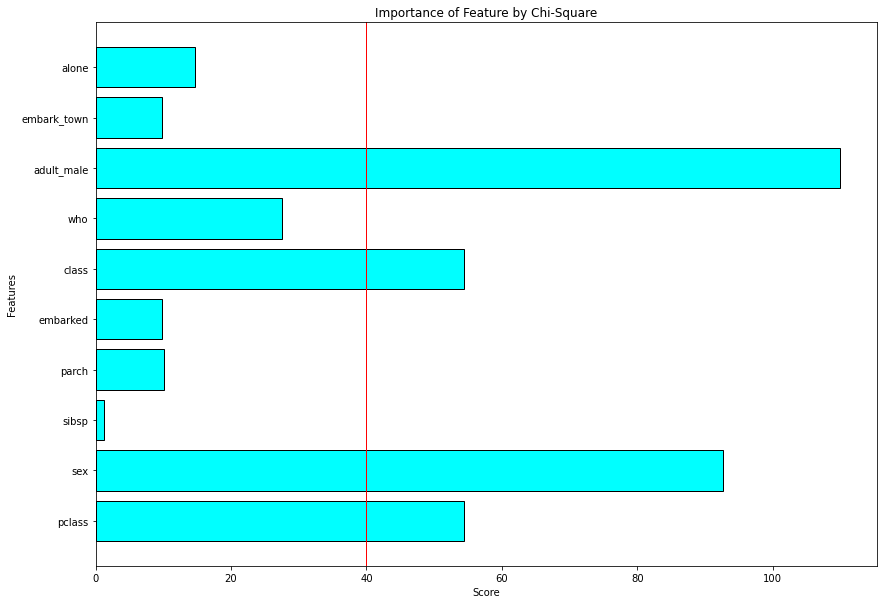

In [9]:
# chi-square test
from sklearn. feature_selection import chi2
chi_score, p_value = chi2(feature_t, label_t)

# lets plot it
plt.figure(figsize=(14, 10))
plt.barh(feature_t.columns, chi_score, color = 'cyan', edgecolor='black')
plt.title('Importance of Feature by Chi-Square')
plt.xlabel('Score')
plt.ylabel('Features')
plt.axvline(40,linewidth=1, color='red')
plt.show()

So according to the chi-square test, these are the rank of columns. We can decide the best column by choosing top n column for we can also put the threshold value like 45.

<a id='fisher-score'></a>
### 1.3 Fisher's Score
Fisher score is one of the most widely used supervised feature selection methods.Fisher’s Score selects each feature independently according to their scores under Fisher criterion leading to a suboptimal set of features. The larger the Fisher’s score is, the better is the selected feature. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

**[▲ Go To Top](#home)**

In [10]:
!pip install skfeature-chappers

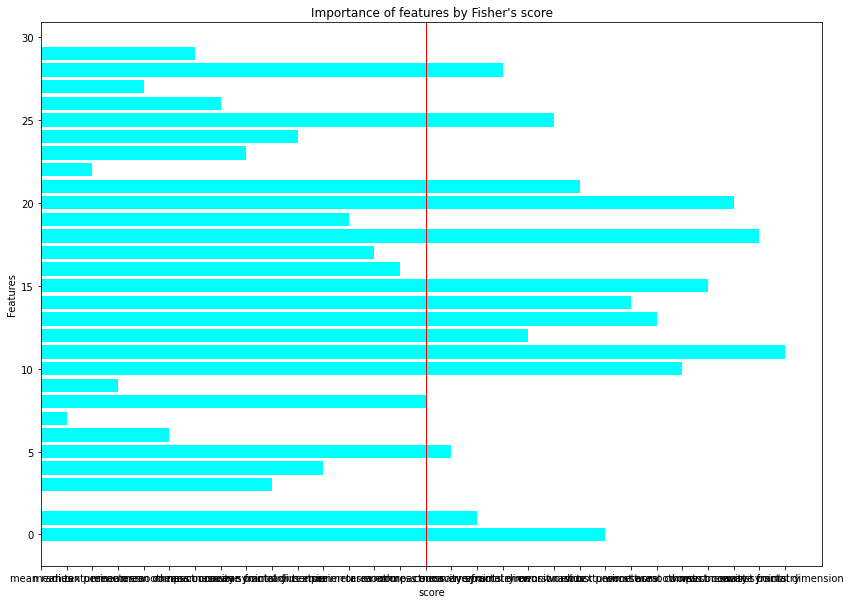

In [11]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

# calculatibg socres
scores = fisher_score.fisher_score(features.values, label.values) # using breast_cancer dataset

plt.rcParams["figure.figsize"] = (14,10)
plt.barh(scores, features.columns, color='cyan')
plt.title('Importance of features by Fisher\'s score')
plt.xlabel('score')
plt.ylabel('Features')
plt.axvline(15,linewidth=1, color='red')
plt.show()

So according to the Fisher's score test, these are the rank of columns. We can decide the best column by choosing top n column for we can also put the threshold value like 15.

<a id='correlation'></a>
### 1.4 Correlation Coeffiecient
Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated(multi-collinearity), we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

**[▲ Go To Top](#home)**

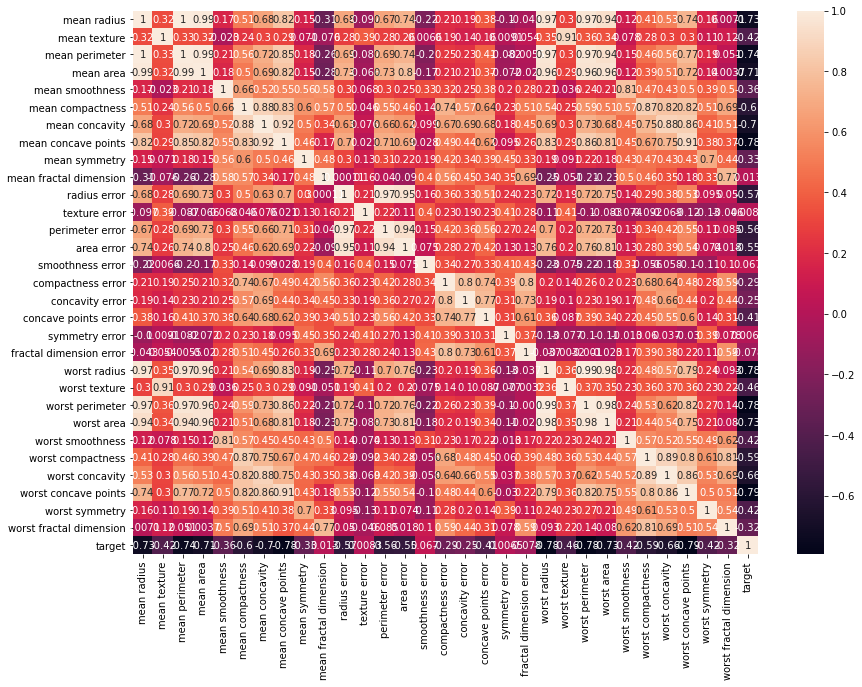

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = df.corr()

# heatmap correlation score
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True)
plt.show()

From the above graph we can check which column is highly correlated with target and we can also check for multicollinearity

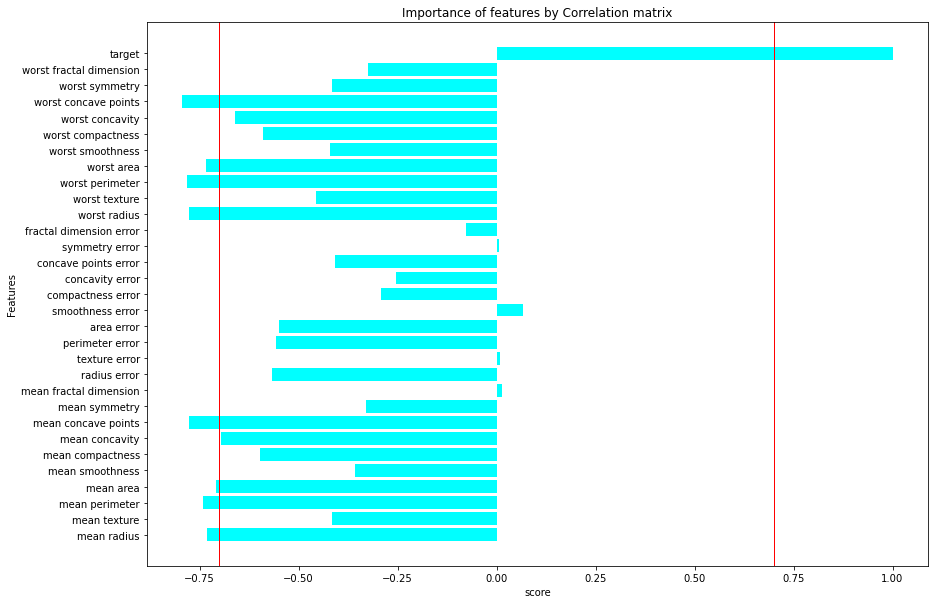

In [13]:
# let's create the bar graph
temp = corr['target']
plt.barh(temp.index, temp, color='cyan')
plt.title('Importance of features by Correlation matrix')
plt.xlabel('score')
plt.ylabel('Features')
plt.axvline(0.7,linewidth=1, color='red')
plt.axvline(-0.7,linewidth=1, color='red')
plt.show()

So according to the correlation matrix test, these are the rank of columns. We can decide the best column by choosing top n column for we can also put the threshold value like we choose the column whose correlation is ±0.7

**Note:** Negatively correlated columns are also important

<a id='variance'></a>
### 1.5 Variance Threshold
The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

**[▲ Go To Top](#home)**

In [14]:
# lets first see the variance of each columns
features.var()

mean radius                    12.418920
mean texture                   18.498909
mean perimeter                590.440480
mean area                  123843.554318
mean smoothness                 0.000198
mean compactness                0.002789
mean concavity                  0.006355
mean concave points             0.001506
mean symmetry                   0.000752
mean fractal dimension          0.000050
radius error                    0.076902
texture error                   0.304316
perimeter error                 4.087896
area error                   2069.431583
smoothness error                0.000009
compactness error               0.000321
concavity error                 0.000911
concave points error            0.000038
symmetry error                  0.000068
fractal dimension error         0.000007
worst radius                   23.360224
worst texture                  37.776483
worst perimeter              1129.130847
worst area                 324167.385102
worst smoothness

In [15]:
from sklearn.feature_selection import VarianceThreshold

variance = VarianceThreshold(threshold=0.3)  # here 0.3 is the variance threshold
variance.fit(features)

# so let's see column which are eligible
variance.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False])

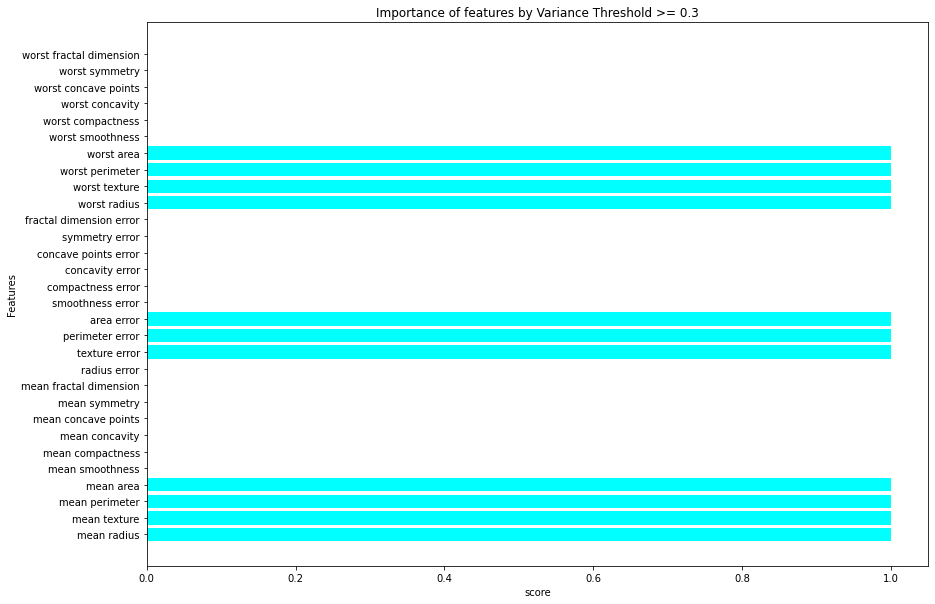

In [16]:
# lets plot for visual ease
temp = pd.Series(variance.get_support()).apply(lambda x: (0, 1)[x==True])

plt.barh(features.columns, temp, color='cyan')
plt.title('Importance of features by Variance Threshold >= 0.3')
plt.xlabel('score')
plt.ylabel('Features')
plt.show()

So these are the variable whose threshold is equal or above to 0.3 

<a id='mad'></a>
### 1.6 Mean Absolute Difference (MAD)
This method is similar to variance threshold method but the difference is there is no square in MAD. This method calculates the mean absolute difference from the mean value. The MAD, like the variance, is also a scale variant. This means that higher the MAD, higher the discriminatory power.

**[▲ Go To Top](#home)**

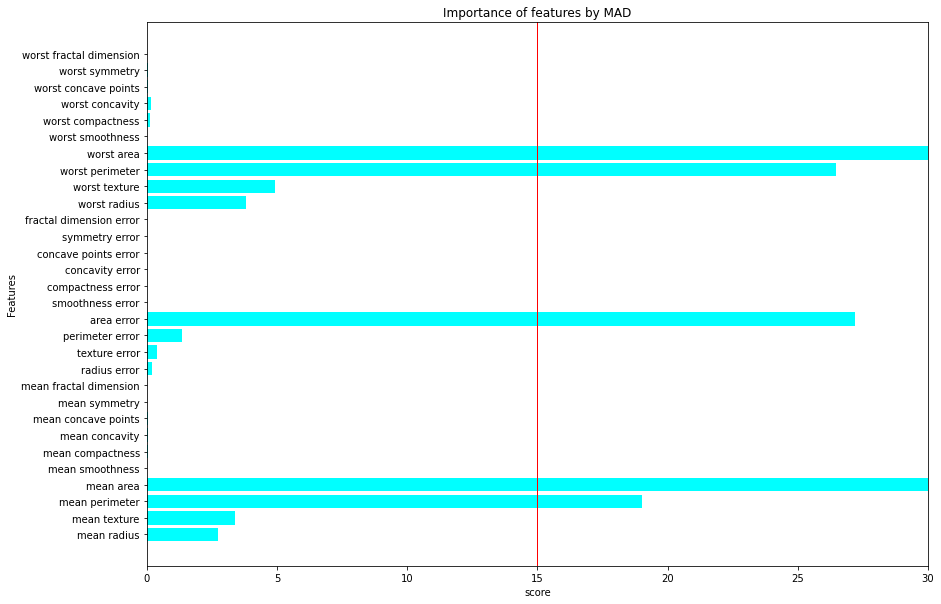

In [17]:
import numpy as np
mad = np.sum(np.abs(features - np.mean(features)))/features.shape[0]

plt.barh(features.columns, mad, color='cyan')
plt.title('Importance of features by MAD')
plt.xlabel('score')
plt.ylabel('Features')
plt.axvline(15,linewidth=1, color='red')
plt.xlim(0, 30) # only two column had value above 250 so other column value wasn't visible so scaling the x axis
plt.show()

So according to the Mean Absolute difference test, these are the rank of columns. We can decide the best column by choosing top n column for we can also put the threshold value like in the example we choose threshold value to be 15

<a id='dr'></a>
### 1.7 Dispersion Ratio
Dispersion ratio is defined as the ratio of the Arithmetic mean (AM) to that of Geometric mean (GM) for a given feature. Its value ranges from `+1 to ∞` as AM ≥ GM for a given feature. Higher dispersion ratio implies a more relevant feature.
> Formula of Arithmetic mean(AM) and Geometic mean(GM)<br>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/Image-16.png" width="400">

**[▲ Go To Top](#home)**

C:\Users\Starman\anaconda3\lib\site-packages\numpy\core\_methods.py:51: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)


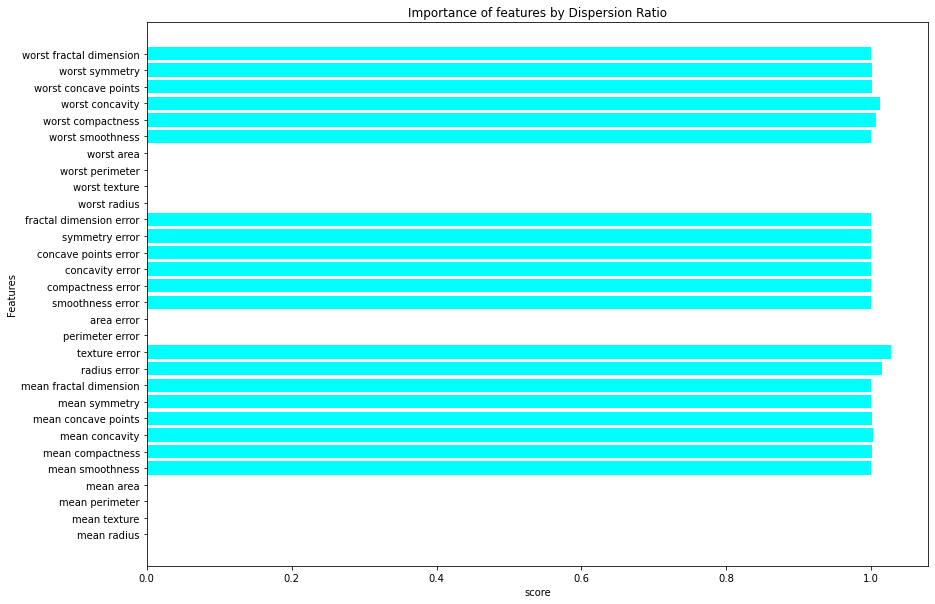

In [18]:
features +=  1 # we are adding 1 to every value so that we don't get 0 in denominator

# Calculate arithmetric mean
am = np.mean(features)

# calculate geometric mean
gm = np.power(np.prod(features), 1/features.shape[0])

# now lets take the ratio of am and gm which is dispersion ratio
disp_ratio = am/gm

# lets see all columns dispersion value
plt.barh(features.columns, disp_ratio, color='cyan')
plt.title('Importance of features by Dispersion Ratio')
plt.xlabel('score')
plt.ylabel('Features')
plt.show()

So according to the Dispersion ratio test, these are the rank of columns.

<a id='ffe'></a>
## 2.0 Wrapper Method
### 2.1 Forward Feature Selection
In forward selection, we start with a null model and then start fitting the model with each individual feature one at a time and select the feature with the minimum p-value. Next, we select another variable that gives the best performance in combination with the first selected variable. Repeat this process until we have a set of selected features with a p-value of individual features less than the significance level.

**[▲ Go To Top](#home)**

In [19]:
!pip install mlxtend

In [20]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(features, label)
sfs.k_feature_names_     # to get the final set of features

('mean compactness',
 'radius error',
 'smoothness error',
 'compactness error',
 'worst radius',
 'worst texture',
 'worst area',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension')

So these are top 10 best features, according to Forward Feature selection

<a id='bfe'></a>
### 2.2 Backward Feature Elimination
This method works exactly opposite to the Forward Feature Selection method. Here, we start with all the features available and build a model. Next, we the variable from the model which gives the best evaluation measure value. The stopping criterion is till no improvement in the performance of the model is observed after the feature is removed. This process is continued until the preset criterion is achieved.

**[▲ Go To Top](#home)**

In [21]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 0)
# note we changed the forward value to false for backward feature selection

sfs.fit(features, label)
sfs.k_feature_names_     # to get the final set of features

('mean compactness',
 'mean concave points',
 'radius error',
 'smoothness error',
 'concavity error',
 'worst radius',
 'worst texture',
 'worst area',
 'worst concavity',
 'worst symmetry')

So these are top 10 best features, according to Backward Feature selection

<a id='bde'></a>
### Bi-directional elimination
It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.

Hence, It is a combination of forward selection and backward elimination.

**[▲ Go To Top](#home)**

In [22]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=True,
          scoring = 'r2',
          cv = 0)
# note we changed the forward, floating value to true for bi-directional elimination

sfs.fit(features, label)
sfs.k_feature_names_     # to get the final set of features

('mean compactness',
 'radius error',
 'smoothness error',
 'compactness error',
 'worst radius',
 'worst texture',
 'worst area',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension')

So these are top 10 best features, according to Bi-directional Feature selection

<a id='efs'></a>
### 2.4 Exhaustive Feature Selection
This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means that it tries every possible combination of the variables and returns the best performing subset. It is very computational expensive and only recommended for small dataset.

**[▲ Go To Top](#home)**

In [23]:
# # Exhaustive Feature Selection
# from mlxtend.feature_selection import ExhaustiveFeatureSelector
# # import the algorithm you want to evaluate on your features.
# from sklearn.ensemble import RandomForestClassifier

# # create the ExhaustiveFeatureSelector object.
# efs = ExhaustiveFeatureSelector (RandomForestClassifier(),
#                                 min_features=4,
#                                 max_features=8,
#                                 scoring='roc_auc',
#                                 cv=2)

# # fit the object to the training data.
# efs = efs.fit(features[:50], label[:50]) # reducing size for faster processing
# # print the selected features.
# selected_features = features.columns[list(efs.best_idx_)]
# print(selected_features)

Not executed the above code because highly computational expensive

In [24]:
# print the final prediction score.
# print(efs.best_score_)

<a id="rfe"></a>
### 2.5 Recursive Feature Elimination
This greedy optimization method selects features by recursively considering the smaller and smaller set of features. The estimator is trained on an initial set of features and their importance is obtained using feature_importance_attribute or through coef_attribute. For eg the coefficients of linear model. The least important features are then removed from the current set of features till we are left with the required number of features.

**[▲ Go To Top](#home)**

In [25]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# initializing rfe
rfe = RFE(RandomForestClassifier(), n_features_to_select = 10)
rfe.fit(features, label)

# let see the selected features
print(features.columns[rfe.support_])

Index(['mean radius', 'mean area', 'mean concavity', 'mean concave points',
       'area error', 'worst radius', 'worst texture', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')


So these are top 10 best features, according to RFE Feature selection

In this above example we choosed 10 so its returned 10 best column. But how do we know how many columns are best, so for that we have something called `RFECV` which has inbuilt cross validation in rfe.In this we have `mini_features_to_select` argument which tells the rfecv to select as many features but there must be specified min features

In [26]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# initializing rfe
rfecv = RFECV(RandomForestClassifier(), min_features_to_select = 5, cv=5, scoring='roc_auc', step=5)
rfecv.fit(features, label)

# let see the selected features
print(features.columns[rfecv.support_])

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concavity error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'],
      dtype='object')


In [27]:
len(features.columns[rfecv.support_])

20

So according to RFECV we need to use 20 features

<a id='regularization'></a>
## 3.0 Embedded Method
### 3.1 Regularization
This method adds a penalty to different parameters of the machine learning model to avoid over-fitting of the model. This approach of feature selection uses Lasso (L1 regularization) and Elastic nets (L1 and L2 regularization). The penalty is applied over the coefficients, thus bringing down some coefficients to zero. The features having zero coefficient can be removed from the dataset.

**[▲ Go To Top](#home)**

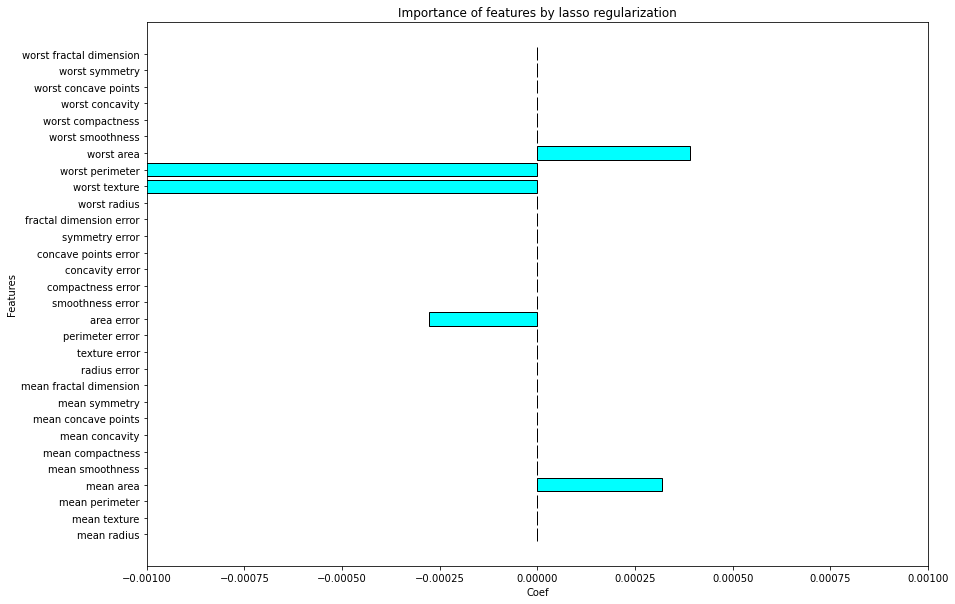

In [28]:
from sklearn.linear_model import Lasso, ElasticNet
lasso = Lasso(alpha=0.1)
coef = lasso.fit(features, label).coef_

# lets see the dropped column
plt.figure(figsize=(14,10))
plt.barh(features.columns, coef, color='cyan', edgecolor='black')
plt.title('Importance of features by lasso regularization')
plt.xlabel('Coef')
plt.ylabel('Features')
plt.xlim(-0.001, 0.001)
plt.show()

In [29]:
sum(coef==0)

25

so according to lasso l1 regularization 25 columns are not useful so it dropped them

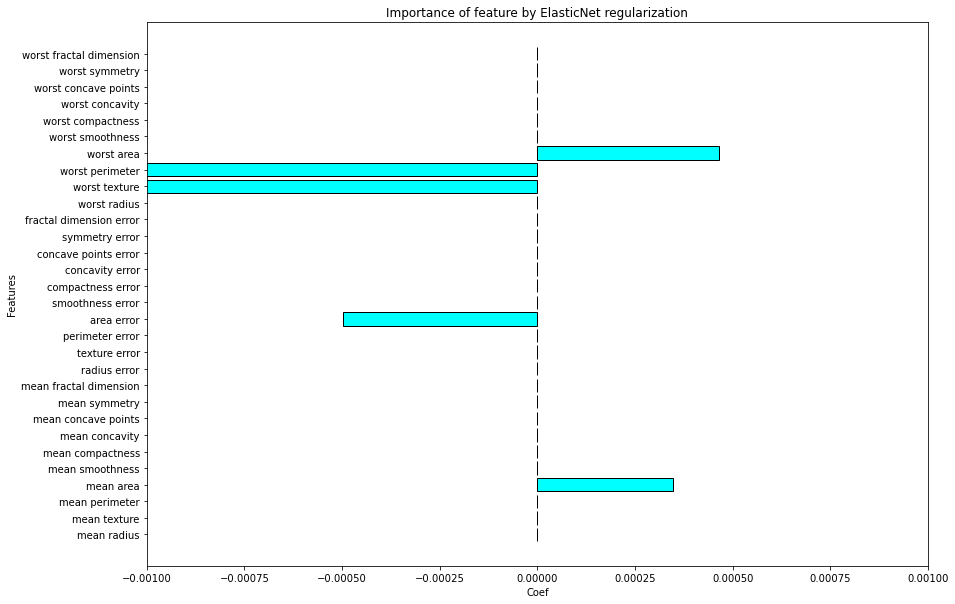

In [30]:
# lets try elastic net
elastic = ElasticNet(alpha=0.1, )
coef = elastic.fit(features, label).coef_

# lets see the dropped column
plt.figure(figsize=(14,10))
plt.barh(features.columns, coef, color='cyan', edgecolor='black')
plt.title('Importance of feature by ElasticNet regularization')
plt.xlabel('Coef')
plt.ylabel('Features')
plt.xlim(-0.001, 0.001)
plt.show()

In [31]:
sum(coef==0)

25

same goes with (l1,l2) regularization 25 columns are not useful so it dropped them

<a id='tree'></a>
### 3.2 Tree-based Method
These methods such as Random Forest, Gradient Boosting provides us feature importance as a way to select features as well. Feature importance tells us which features are more important in making an impact on the target feature.

**[▲ Go To Top](#home)**

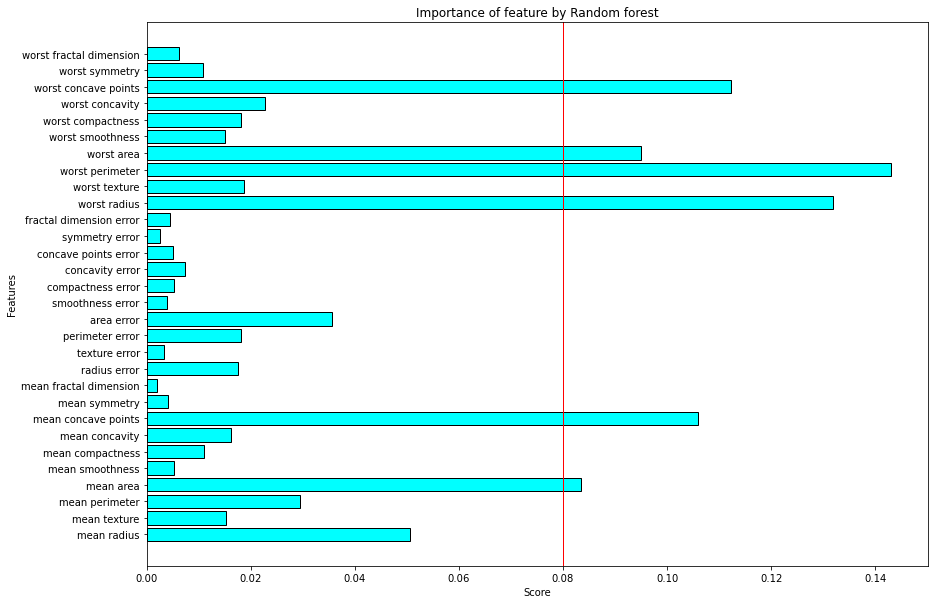

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier().fit(features, label)
feat_imp = rf.feature_importances_

# lets see the dropped column
plt.figure(figsize=(14,10))
plt.barh(features.columns, feat_imp, color='cyan', edgecolor='black')
plt.title('Importance of feature by Random forest')
plt.xlabel('Score')
plt.ylabel('Features')
plt.axvline(0.08, linewidth=1, color='red')
plt.show()

So according to the tree-based model random forest test, these are the rank of columns. We can decide the best column by choosing top n column for we can also put the threshold value like we choosed the threshold as 0.08

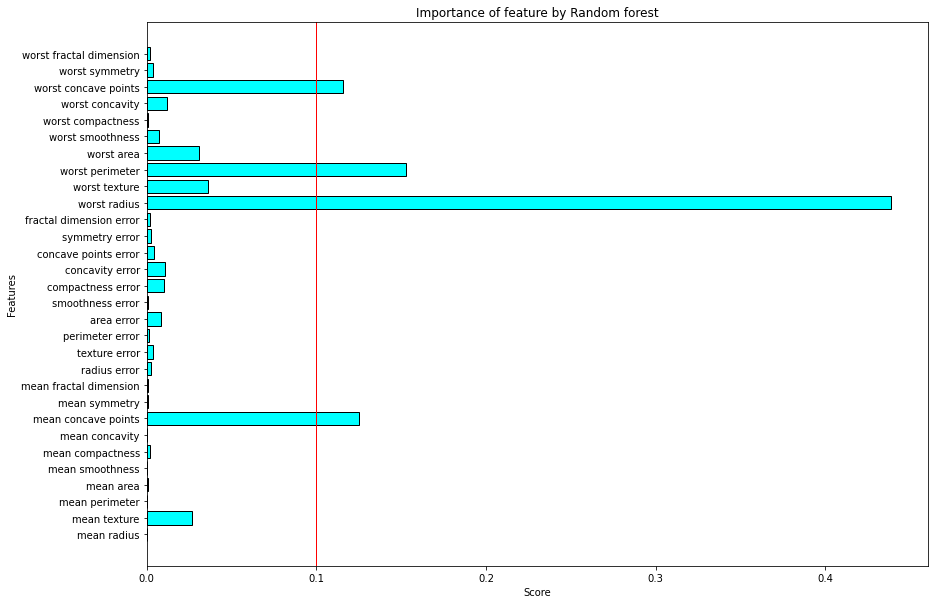

In [33]:
# lets try gradient boosting
gb = GradientBoostingClassifier().fit(features, label)
feat_imp = gb.feature_importances_

# lets see the dropped column
plt.figure(figsize=(14,10))
plt.barh(features.columns, feat_imp, color='cyan', edgecolor='black')
plt.title('Importance of feature by Random forest')
plt.xlabel('Score')
plt.ylabel('Features')
plt.axvline(0.1, linewidth=1, color='red')
plt.show()

So according to the tree-based model gradient boosting test, these are the rank of columns. We can decide the best column by choosing top n column for we can also put the threshold value like we choosed the threshold as 0.1